# Lab 7 - Clustering

We will create cluster (groups of records/patients) according to their speech features and analyze it. For this, we are going to use K-means with differente values of k to see the impact of the parameter.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [175]:
import pandas as pd
import numpy as np
from sklearn import metrics, cluster
from utils import graphFunctions as graph
import matplotlib.pyplot as plt

In [5]:
data_9: pd.DataFrame = pd.read_csv('../datasets/pd_data_preparation_9.csv', sep=',', decimal='.', index_col='id')
y_9: np.ndarray = data_9.pop('class').values
X_9: np.ndarray = data_9.values
labels_9 = pd.unique(y_9)

data_9.head()

,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,meanHarmToNoiseHarmonicity,...,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_36
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.916232,0.475707,0.590235,0.284974,0.022323,0.075900,0.271284,0.944323,0.626765,...,0.013066,0.004055,0.003293,0.000374,0.000178,0.000191,0.008863,0.098628,0.031079,0.218287
1,0.0,0.182314,0.806469,0.630075,0.242228,0.689703,0.247423,0.228818,0.876238,0.577781,...,0.038398,0.008310,0.001114,0.001689,0.024783,0.018258,0.022440,0.040204,0.058074,0.017145
2,1.0,0.877689,0.216841,0.516437,0.448187,0.033848,0.087255,0.117413,0.974092,0.665577,...,0.007834,0.019385,0.000201,0.000368,0.000336,0.213153,0.204655,0.120303,0.125812,0.028947
3,0.0,0.925807,0.237611,0.542708,0.785622,0.010547,0.021814,0.161006,0.983185,0.775315,...,0.037870,0.020783,0.009404,0.018881,0.003916,0.000815,0.002275,0.009216,0.015696,0.216241
4,0.0,0.930451,0.757013,0.842307,0.532383,0.754983,0.148962,0.722861,0.734980,0.314902,...,0.022389,0.009184,0.006695,0.009538,0.010617,0.013877,0.018696,0.010267,0.090744,0.662076


## K-means

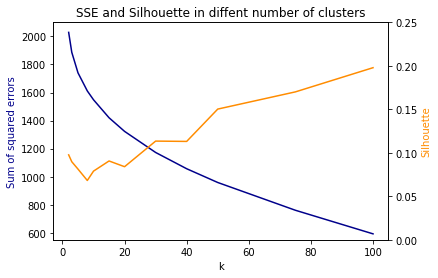

In [140]:
n_clusters = np.array([2, 3, 5, 8, 10, 15, 20, 30, 40, 50, 75, 100])
results = np.zeros((len(n_clusters), 5))
for i in range(len(n_clusters)):
    kmeans = cluster.KMeans(n_clusters=n_clusters[i], random_state=1).fit(X_9)
    y_pred = kmeans.labels_
    value_counts = pd.Series(y_pred).value_counts()
    results[i][0] = kmeans.inertia_
    results[i][1] = metrics.silhouette_score(X_9, y_pred)
    results[i][2] = value_counts[value_counts == 1].shape[0]
    results[i][3] = metrics.adjusted_rand_score(y_9, y_pred)
    results[i][4] = metrics.homogeneity_score(y_9, y_pred)

plt.figure()
graph.double_line_chart_different_scales(plt.gca(), n_clusters, results[:, 0], results[:, 1], "SSE and Silhouette in diffent number of clusters", "k", "Sum of squared errors", "Silhouette", y_interval=(550, 2100), y_interval2=(0,0.25))

The high number of outliers and features by the low number of features result in clusters not that well divided, represented by the metric Sum of Squared Distances. This problem, usually, is even worse in k-means because the mean is sensitive to outliers.
One way to minimize the distance would be increase the number of clusters, but it can create a lot of clusters with low number of records, which may not be so useful. To see this, we will plot a histogram with the number of clusters with just 1 record by the number of clusters.

<BarContainer object of 12 artists>

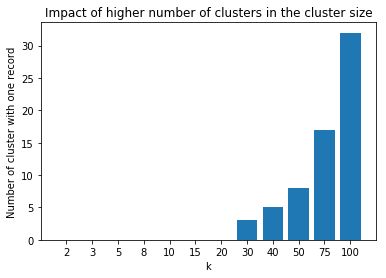

In [124]:
fig = plt.figure()
ax = plt.gca()
ax.set_title("Impact of higher number of clusters in the cluster size")
ax.set_xlabel("k")
ax.set_ylabel("Number of cluster with one record")
plt.bar(n_clusters.astype(str), results[:, 2])

We can also analyze the Adjusted Rand Score for every k tested to see how the metric progress and the homogeneity in each cluster.

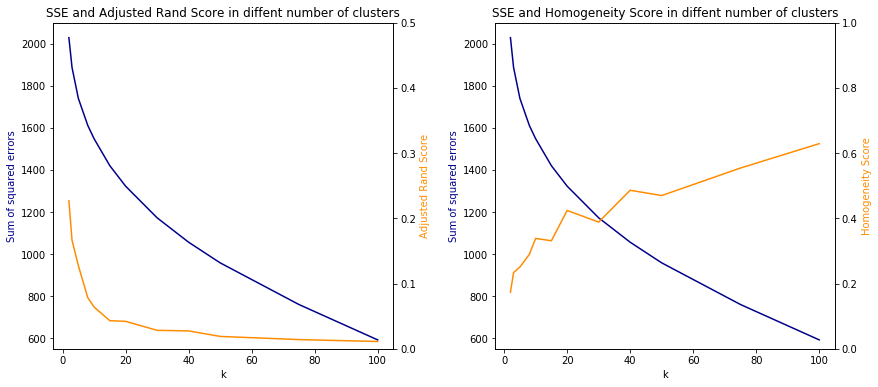

In [257]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
plt.subplots_adjust(wspace=0.3)
graph.double_line_chart_different_scales(ax[0], n_clusters, results[:, 0], results[:, 3], "SSE and Adjusted Rand Score in diffent number of clusters", "k", "Sum of squared errors", "Adjusted Rand Score", y_interval=(550, 2100), y_interval2=(0,0.5))
graph.double_line_chart_different_scales(ax[1], n_clusters, results[:, 0], results[:, 4], "SSE and Homogeneity Score in diffent number of clusters", "k", "Sum of squared errors", "Homogeneity Score", y_interval=(550, 2100), y_interval2=(0,1))

The calculation of the Rand Score considers the number of records from the same class in different clusters, therefore higher numbers of clusters result in low scores.

## Visualizing the result

Considering some different k, we will plot the resulting clusters using as axis 2 components generated using PCA (Principal Component Analysis).

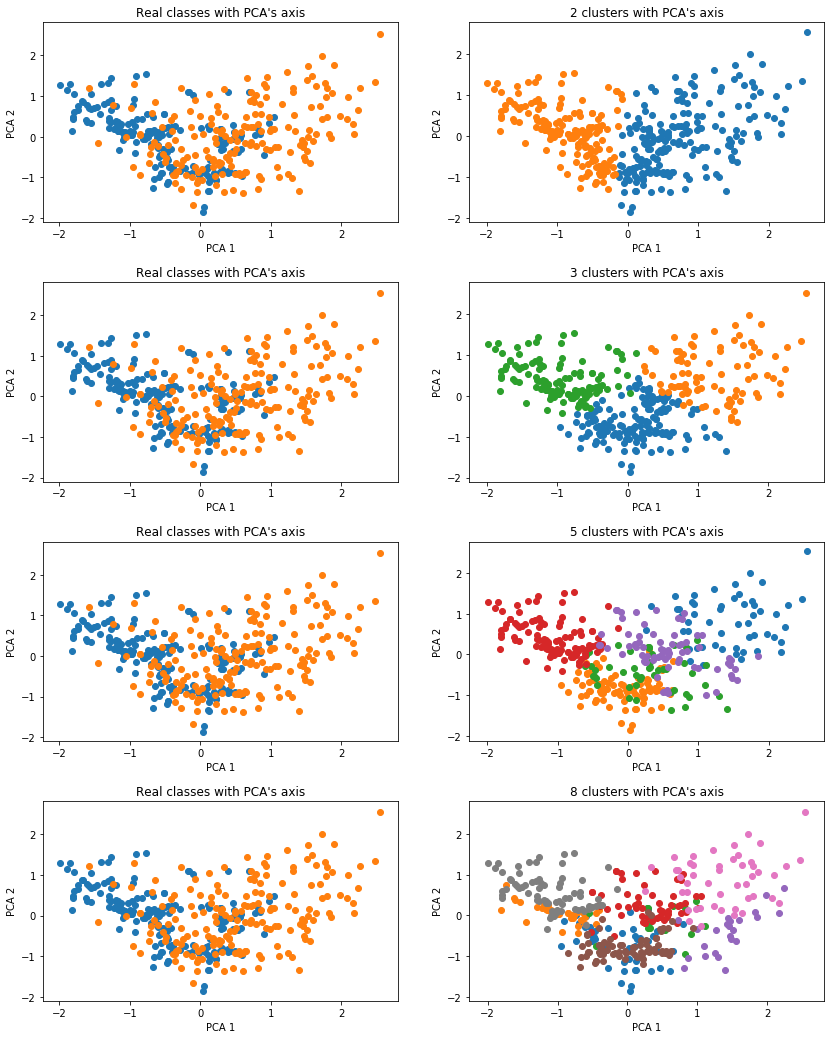

In [261]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x = pca.fit_transform(X_9)

n_plot = [2, 3, 5, 8]

fig, ax = plt.subplots(len(n_plot), 2, figsize=(14, 18))
plt.subplots_adjust(hspace = 0.3)
for i in range(len(n_plot)):
    kmeans = cluster.KMeans(n_clusters=n_plot[i], random_state=1).fit(X_9)
    y_pred = kmeans.labels_
    x_new = np.concatenate((x, y_9.reshape((len(y_9), 1)), y_pred.reshape((len(y_9), 1))), axis=1)

    ax[i, 0].set_title("Real classes with PCA's axis")
    ax[i, 0].set_xlabel("PCA 1")
    ax[i, 0].set_ylabel("PCA 2")
    for j in range(len(np.unique(y_9))):
        ax[i, 0].scatter(x_new[x_new[:, 2] == j][:, 0], x_new[x_new[:, 2] == j][:, 1])

    ax[i, 1].set_title(str(n_plot[i])+ " clusters with PCA's axis")
    ax[i, 1].set_xlabel("PCA 1")
    ax[i, 1].set_ylabel("PCA 2")
    for j in range(len(np.unique(y_pred))):
        ax[i, 1].scatter(x_new[x_new[:, 3] == j][:, 0], x_new[x_new[:, 3] == j][:, 1])


One possible approuch after clustering could be utilize the k=3 or k=5 to classify some cases (the most homogeneous ones) and, then, use another model for each remaining cluster.